# HFF Water Quality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.stattools import adfuller

In [2]:
def display_df(dftest):
    '''
    Display the output from a Dickey-Fuller test in a more readable format
    '''
    
    
    dfoutput = pd.Series(
                dftest[0:4], 
                index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    display(dfoutput)

In [3]:
ipe_df = pd.read_csv('data/15_min_data_HFF/IPE 15 min 2022-08-08.csv')
ipe_df

,contTime,Turb_FNU,TurbDailyMn,TurbSamp_NTU,Chloro_RFU,ChloroDailyMn,BGA_RFU,BGADailyMn,ODO_mgL,ODODailyMn,...,Temp_C_raw,Cond_muSCm_raw,TDS_mgL_raw,TotalPres_psi_raw,Turb_avdymn,Chlor_avdymn,Cyano_avdymn,Temp_avdymn,ODO_avdymn,Cond_avdymn
0,2014-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-06-20 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014-06-20 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014-06-20 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014-06-20 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285217,2022-08-07 23:00:00,5.48,NaN,NaN,0.34,NaN,0.02,NaN,7.49,NaN,...,18.66,123.4,0.09,13.17,NaN,NaN,NaN,NaN,NaN,NaN
285218,2022-08-07 23:15:00,5.74,NaN,NaN,0.27,NaN,0.03,NaN,7.48,NaN,...,18.64,123.5,0.09,13.17,NaN,NaN,NaN,NaN,NaN,NaN
285219,2022-08-07 23:30:00,6.37,NaN,NaN,0.29,NaN,0.03,NaN,7.47,NaN,...,18.64,123.4,0.09,13.17,NaN,NaN,NaN,NaN,NaN,NaN
285220,2022-08-07 23:45:00,6.40,NaN,NaN,0.34,NaN,0.02,NaN,7.48,NaN,...,18.63,123.4,0.09,13.17,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
ipe_df['contTime'] = pd.to_datetime(ipe_df['contTime'])
ipe_df.set_index(['contTime'], inplace=True)
ipe_df.index.names = ['date']
ipe_df

,Turb_FNU,TurbDailyMn,TurbSamp_NTU,Chloro_RFU,ChloroDailyMn,BGA_RFU,BGADailyMn,ODO_mgL,ODODailyMn,Temp_C,...,Temp_C_raw,Cond_muSCm_raw,TDS_mgL_raw,TotalPres_psi_raw,Turb_avdymn,Chlor_avdymn,Cyano_avdymn,Temp_avdymn,ODO_avdymn,Cond_avdymn
date,,,,,,,,,,,,,,,,,,,,,
2014-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-20 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-20 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-20 00:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-06-20 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-07 23:00:00,5.48,NaN,NaN,0.34,NaN,0.02,NaN,7.49,NaN,18.66,...,18.66,123.4,0.09,13.17,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-07 23:15:00,5.74,NaN,NaN,0.27,NaN,0.03,NaN,7.48,NaN,18.64,...,18.64,123.5,0.09,13.17,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-07 23:30:00,6.37,NaN,NaN,0.29,NaN,0.03,NaN,7.47,NaN,18.64,...,18.64,123.4,0.09,13.17,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
ipe_daily = ipe_df.resample('D').mean()

In [6]:
ipe_daily = ipe_daily[:'2022-08-01']

In [7]:
ipe_daily

,Turb_FNU,TurbDailyMn,TurbSamp_NTU,Chloro_RFU,ChloroDailyMn,BGA_RFU,BGADailyMn,ODO_mgL,ODODailyMn,Temp_C,...,Temp_C_raw,Cond_muSCm_raw,TDS_mgL_raw,TotalPres_psi_raw,Turb_avdymn,Chlor_avdymn,Cyano_avdymn,Temp_avdymn,ODO_avdymn,Cond_avdymn
date,,,,,,,,,,,,,,,,,,,,,
2014-06-20,2.282571,NaN,2.883333,0.343889,NaN,-0.009167,NaN,6.402500,NaN,13.020333,...,13.020333,98.772222,83.000000,11.642306,2.948023,0.603837,0.102474,13.602552,7.434667,119.362484
2014-06-21,2.491979,2.487097,NaN,0.366667,0.367527,-0.003125,-0.002581,6.491563,6.511828,12.617740,...,12.617740,97.936458,83.302083,11.666146,3.087716,0.643661,0.112450,13.759623,7.438532,119.774590
2014-06-22,2.760521,2.760521,NaN,0.370417,0.370417,-0.002396,-0.002396,6.799479,6.799479,12.587917,...,12.587917,98.336458,83.875000,11.690604,3.302915,0.710180,0.154355,13.946474,7.471170,120.355465
2014-06-23,3.366875,3.366875,4.056667,0.427187,0.427187,0.011667,0.011667,6.973333,6.973333,12.869354,...,12.869354,100.618750,85.187500,11.717281,3.678330,0.552335,0.076311,13.898306,7.783264,119.795716
2014-06-24,4.185000,4.185000,NaN,0.578438,0.578438,0.051042,0.051042,6.847812,6.847812,12.998385,...,12.998385,104.945833,88.541667,11.707031,3.881812,0.502070,0.072871,14.001303,7.923084,121.559347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28,4.219896,4.219896,NaN,0.428229,0.428229,0.047188,0.047188,6.822292,6.822292,19.556458,...,19.556458,156.690625,0.110000,13.335000,3.351399,0.329851,0.105151,18.231818,6.663407,147.675620
2022-07-29,3.899583,3.899583,NaN,0.438333,0.438333,0.048646,0.048646,6.774479,6.774479,19.535104,...,19.535104,157.709375,0.110000,13.340729,3.625946,0.314202,0.068919,18.155853,6.629087,147.180402
2022-07-30,3.379583,3.379583,NaN,0.413229,0.413229,0.047708,0.047708,6.654688,6.654687,19.576562,...,19.576562,158.085417,0.110000,13.353229,3.899483,0.320148,0.051110,18.024200,6.586092,146.751797


<AxesSubplot:xlabel='date'>

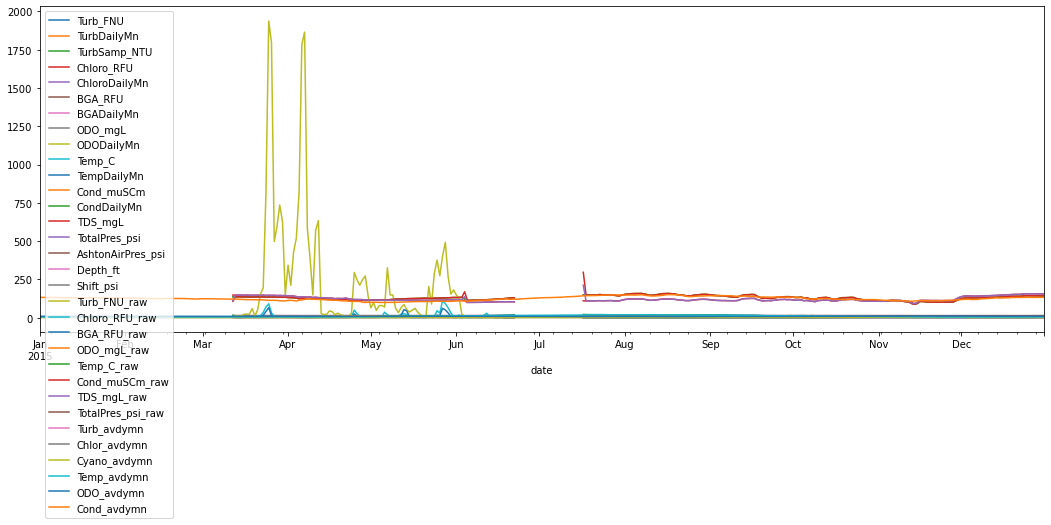

In [8]:
ipe_daily.loc['2015'].plot(figsize=(18,6))

In [9]:
ipe_daily.isna().sum()

Turb_FNU              348
TurbDailyMn           349
TurbSamp_NTU         2670
Chloro_RFU            355
ChloroDailyMn         356
BGA_RFU               353
BGADailyMn            354
ODO_mgL               193
ODODailyMn            194
Temp_C                191
TempDailyMn           192
Cond_muSCm            191
CondDailyMn           192
TDS_mgL               191
TotalPres_psi         191
AshtonAirPres_psi    1697
Depth_ft             1742
Shift_psi             161
Turb_FNU_raw          191
Chloro_RFU_raw        191
BGA_RFU_raw           191
ODO_mgL_raw           191
Temp_C_raw            191
Cond_muSCm_raw        191
TDS_mgL_raw           191
TotalPres_psi_raw     191
Turb_avdymn             0
Chlor_avdymn            0
Cyano_avdymn            0
Temp_avdymn             0
ODO_avdymn              0
Cond_avdymn             0
dtype: int64

In [10]:
ipe_daily.columns

Index(['Turb_FNU', 'TurbDailyMn', 'TurbSamp_NTU', 'Chloro_RFU',
       'ChloroDailyMn', 'BGA_RFU', 'BGADailyMn', 'ODO_mgL', 'ODODailyMn',
       'Temp_C', 'TempDailyMn', 'Cond_muSCm', 'CondDailyMn', 'TDS_mgL',
       'TotalPres_psi', 'AshtonAirPres_psi', 'Depth_ft', 'Shift_psi',
       'Turb_FNU_raw', 'Chloro_RFU_raw', 'BGA_RFU_raw', 'ODO_mgL_raw',
       'Temp_C_raw', 'Cond_muSCm_raw', 'TDS_mgL_raw', 'TotalPres_psi_raw',
       'Turb_avdymn', 'Chlor_avdymn', 'Cyano_avdymn', 'Temp_avdymn',
       'ODO_avdymn', 'Cond_avdymn'],
      dtype='object')

In [11]:
ipe_daily.drop(['TotalPres_psi', 'Turb_FNU', 'TurbDailyMn', 'TurbSamp_NTU', 'Chloro_RFU',
       'ChloroDailyMn', 'BGA_RFU', 'BGADailyMn', 'ODO_mgL', 'ODODailyMn',
       'Temp_C', 'TempDailyMn', 'Cond_muSCm', 'CondDailyMn', 'TDS_mgL', 'TotalPres_psi_raw',
       'Turb_avdymn', 'Chlor_avdymn', 'Cyano_avdymn', 'Temp_avdymn', 'Shift_psi',
       'ODO_avdymn', 'Cond_avdymn', 'AshtonAirPres_psi', 'Depth_ft'], axis=1, inplace=True)

In [12]:
ipe_interp = ipe_daily.interpolate(method='spline', order=2)

In [13]:
ipe_interp.columns

Index(['Turb_FNU_raw', 'Chloro_RFU_raw', 'BGA_RFU_raw', 'ODO_mgL_raw',
       'Temp_C_raw', 'Cond_muSCm_raw', 'TDS_mgL_raw'],
      dtype='object')

In [14]:
ipe_interp.isna().sum()

Turb_FNU_raw      0
Chloro_RFU_raw    0
BGA_RFU_raw       0
ODO_mgL_raw       0
Temp_C_raw        0
Cond_muSCm_raw    0
TDS_mgL_raw       0
dtype: int64

In [15]:
ipe_interp.dropna(inplace=True)

<AxesSubplot:xlabel='date'>

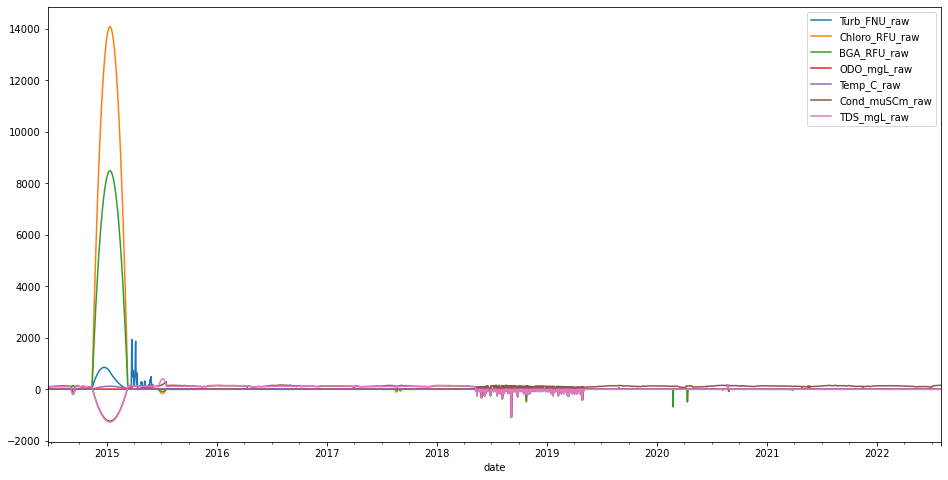

In [16]:
ipe_interp.plot(figsize=(16,8))

In [17]:
ipe_interp.corr()

,Turb_FNU_raw,Chloro_RFU_raw,BGA_RFU_raw,ODO_mgL_raw,Temp_C_raw,Cond_muSCm_raw,TDS_mgL_raw
Turb_FNU_raw,1.000000,0.705183,0.707896,0.287114,0.529890,-0.629231,-0.562999
Chloro_RFU_raw,0.705183,1.000000,0.999905,0.045545,0.436295,-0.970711,-0.916569
BGA_RFU_raw,0.707896,0.999905,1.000000,0.057370,0.446889,-0.968211,-0.913528
ODO_mgL_raw,0.287114,0.045545,0.057370,1.000000,0.905702,0.162612,0.203583
Temp_C_raw,0.529890,0.436295,0.446889,0.905702,1.000000,-0.233900,-0.181156
Cond_muSCm_raw,-0.629231,-0.970711,-0.968211,0.162612,-0.233900,1.000000,0.952351
TDS_mgL_raw,-0.562999,-0.916569,-0.913528,0.203583,-0.181156,0.952351,1.000000


In [18]:
hydro_df = pd.read_csv('data/IslandPark.TS.csv')
hydro_df['date'] = pd.to_datetime(hydro_df['date'])
hydro_df.set_index(['date'], inplace=True)
hydro_df.index.names = ['date']
hydro_df.columns

Index(['elevation.ft', 'volume.af', 'smoothed.vol', 'smoothed.elev',
       'surfacearea.acres', 'net.evap.af', 'delta.V.af', 'regQ.cfs',
       'gain.cfs', 'smoothed.natQ.cfs'],
      dtype='object')

In [19]:
hydro_df = hydro_df['2014-06-20':'2022-08-01']

In [20]:
hydro_interp = hydro_df.interpolate(method='spline', order=2)

In [21]:
# calculate exposed shoreline
hydro_interp['exposed_shore'] = 8000 - hydro_interp['surfacearea.acres']

In [22]:
hydro_interp

,elevation.ft,volume.af,smoothed.vol,smoothed.elev,surfacearea.acres,net.evap.af,delta.V.af,regQ.cfs,gain.cfs,smoothed.natQ.cfs,exposed_shore
date,,,,,,,,,,,
2014-06-20,6302.410000,130463.600000,130508.842857,6302.415714,7270.598650,45.963939,157.885714,476.000000,512.621037,591.405028,729.401350
2014-06-21,6302.430000,130621.900000,130700.671429,6302.440000,7273.992421,47.815575,191.828571,459.000000,513.032397,599.594050,726.007579
2014-06-22,6302.490000,131097.500000,130858.485714,6302.460000,7277.366317,45.131249,157.814286,449.000000,483.831078,601.354315,722.633683
2014-06-23,6302.460000,130857.600000,130971.200000,6302.474286,7279.964667,49.711959,112.714286,459.000000,473.033457,586.847675,720.035333
2014-06-24,6302.510000,131252.600000,131209.542857,6302.504286,7283.303116,50.669190,238.342857,448.000000,525.632347,582.186314,716.696884
...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28,6297.244536,93365.484536,93409.446819,6297.247585,6111.232399,45.817345,-1345.832163,1182.187500,407.214395,442.453386,1888.767601
2022-07-29,6297.048306,92114.281296,92105.295324,6297.045029,6053.389930,45.452590,-1304.151495,1181.875000,429.932614,451.777714,1946.610070
2022-07-30,6296.847349,90828.083947,90842.356436,6296.846761,5996.327878,45.092242,-1262.938888,1183.750000,454.622985,465.082169,2003.672122


<AxesSubplot:xlabel='date'>

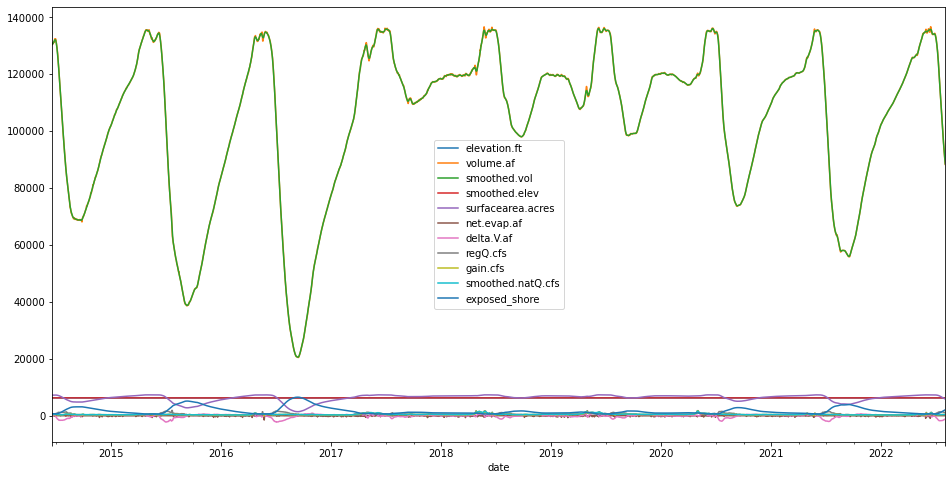

In [23]:
hydro_interp.plot(figsize=(16,8))

In [24]:
climate_df = pd.read_csv('data/Clean.Climate.TS.csv')
climate_df['Date'] = pd.to_datetime(climate_df['Date'])
climate_df.set_index(['Date'], inplace=True)
climate_df.drop(['GT.TAVE', 'GT.TMIN', 'GT.TMAX', 'GT.DP', 'GT.AP', 'GT.SWE', 'PB.TAVE',
       'PB.TMIN', 'PB.TMAX', 'PB.DP','HFW.AP', 'TR.SWE', 'FR.SWE', 'HF.SWE', 'HFW.SWE', 'AG.DP', 'AG.ET',
       'HFW.Cum.P', 'AG.Cum.P', 'AG.Cum.ET', 'PB.AP', 'PB.SWE', 'BB.TAVE', 'BB.TMIN', 'BB.TMAX', 'BB.DP', 'BB.AP',
       'BB.SWE', 'LL.TAVE', 'LL.TMIN', 'LL.TMAX', 'LL.DP', 'LL.AP', 'LL.SWE', 'GL.TAVE',
       'GL.TMIN', 'GL.TMAX', 'GL.DP', 'GL.AP', 'GL.SWE', 'PC.TAVE', 'PC.TMIN', 'PC.TMAX',
       'PC.DP', 'PC.AP', 'PC.SWE', 'AL.TAVE', 'AL.TMIN', 'AL.TMAX', 'AL.DP', 'AL.AP',
       'AS.TAVE', 'AS.TMIN', 'AS.TMAX', 'AS.DP', 'AS.AP', 'AS.ET', 'RX.TAVE',
       'RX.TMIN', 'RX.TMAX', 'RX.DP', 'RX.AP', 'RX.ET', 'TR.TAVE', 'FR.TAVE',
       'HF.TAVE', 'VA.TAVE', 'HFW.TAVE', 'TR.TMIN', 'FR.TMIN', 'HF.TMIN',
       'VA.TMIN', 'HFW.TMIN', 'TR.TMAX', 'FR.TMAX', 'HF.TMAX', 'VA.TMAX',
       'HFW.TMAX', 'TR.DP', 'FR.DP', 'HF.DP', 'VA.DP', 'HFW.DP', 'TR.AP',
       'FR.AP', 'HF.AP', 'VA.AP'], axis=1, inplace=True)
climate_df.index.names = ['date']
climate_df.columns

Index(['WE.TAVE', 'WE.TMIN', 'WE.TMAX', 'WE.DP', 'WE.AP', 'WE.SWE', 'CC.TAVE',
       'CC.TMIN', 'CC.TMAX', 'CC.DP', 'CC.AP', 'CC.SWE', 'IP.TAVE', 'IP.TMIN',
       'IP.TMAX', 'IP.DP', 'IP.AP', 'IP.SWE'],
      dtype='object')

In [25]:
climate_df = climate_df['2014-06-20':'2022-08-01']

In [26]:
clim_interp = climate_df.interpolate(method='spline', order=2)

In [27]:
clim_interp.isna().sum()

WE.TAVE    0
WE.TMIN    0
WE.TMAX    0
WE.DP      0
WE.AP      0
WE.SWE     0
CC.TAVE    0
CC.TMIN    0
CC.TMAX    0
CC.DP      0
CC.AP      0
CC.SWE     0
IP.TAVE    0
IP.TMIN    0
IP.TMAX    0
IP.DP      0
IP.AP      0
IP.SWE     0
dtype: int64

<AxesSubplot:xlabel='date'>

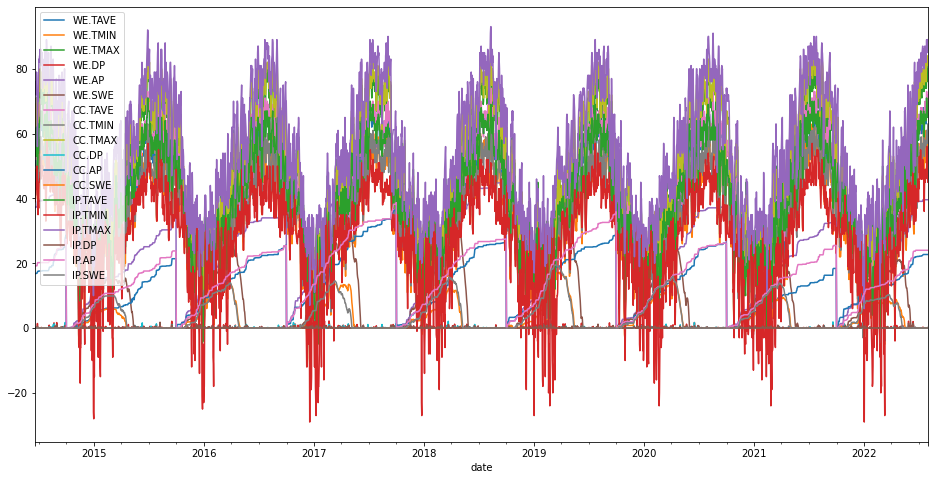

In [28]:
clim_interp.plot(figsize=(16,8))

In [29]:
clim_interp

,WE.TAVE,WE.TMIN,WE.TMAX,WE.DP,WE.AP,WE.SWE,CC.TAVE,CC.TMIN,CC.TMAX,CC.DP,CC.AP,CC.SWE,IP.TAVE,IP.TMIN,IP.TMAX,IP.DP,IP.AP,IP.SWE
date,,,,,,,,,,,,,,,,,,
2014-06-20,56.0,46.0,67.0,0.0,37.2,0.0,58.0,46.0,69.0,0.1,16.8,0.0,58.0,39.0,75.0,0.0,19.2,0.0
2014-06-21,55.0,49.0,62.0,0.0,37.2,0.0,58.0,48.0,68.0,0.0,16.8,0.0,58.0,42.0,76.0,0.0,19.2,0.0
2014-06-22,50.0,43.0,57.0,0.2,37.4,0.0,52.0,46.0,62.0,0.0,16.8,0.0,53.0,45.0,72.0,0.0,19.2,0.0
2014-06-23,54.0,44.0,64.0,0.0,37.4,0.0,56.0,45.0,68.0,0.1,16.9,0.0,58.0,43.0,75.0,0.0,19.2,0.0
2014-06-24,58.0,47.0,71.0,0.0,37.4,0.0,60.0,51.0,71.0,0.0,16.9,0.0,62.0,47.0,79.0,0.0,19.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28,67.0,60.0,76.0,0.0,39.6,0.0,68.0,61.0,81.0,0.0,22.7,0.0,69.0,56.0,85.0,0.0,24.0,0.0
2022-07-29,66.0,56.0,78.0,0.0,39.6,0.0,67.0,57.0,83.0,0.0,22.7,0.0,66.0,52.0,86.0,0.0,24.0,0.0
2022-07-30,69.0,58.0,80.0,0.0,39.6,0.0,70.0,59.0,84.0,0.0,22.7,0.0,66.0,48.0,89.0,0.0,24.0,0.0


In [31]:
final_df = pd.merge(clim_interp, hydro_interp, on=['date'])

In [32]:
final_df.isna().sum()

WE.TAVE              0
WE.TMIN              0
WE.TMAX              0
WE.DP                0
WE.AP                0
WE.SWE               0
CC.TAVE              0
CC.TMIN              0
CC.TMAX              0
CC.DP                0
CC.AP                0
CC.SWE               0
IP.TAVE              0
IP.TMIN              0
IP.TMAX              0
IP.DP                0
IP.AP                0
IP.SWE               0
elevation.ft         0
volume.af            0
smoothed.vol         0
smoothed.elev        0
surfacearea.acres    0
net.evap.af          0
delta.V.af           0
regQ.cfs             0
gain.cfs             0
smoothed.natQ.cfs    0
exposed_shore        0
dtype: int64

In [33]:
final_df.loc['2015'].isna().sum()

WE.TAVE              0
WE.TMIN              0
WE.TMAX              0
WE.DP                0
WE.AP                0
WE.SWE               0
CC.TAVE              0
CC.TMIN              0
CC.TMAX              0
CC.DP                0
CC.AP                0
CC.SWE               0
IP.TAVE              0
IP.TMIN              0
IP.TMAX              0
IP.DP                0
IP.AP                0
IP.SWE               0
elevation.ft         0
volume.af            0
smoothed.vol         0
smoothed.elev        0
surfacearea.acres    0
net.evap.af          0
delta.V.af           0
regQ.cfs             0
gain.cfs             0
smoothed.natQ.cfs    0
exposed_shore        0
dtype: int64

In [34]:
final_df.head()

,WE.TAVE,WE.TMIN,WE.TMAX,WE.DP,WE.AP,WE.SWE,CC.TAVE,CC.TMIN,CC.TMAX,CC.DP,...,volume.af,smoothed.vol,smoothed.elev,surfacearea.acres,net.evap.af,delta.V.af,regQ.cfs,gain.cfs,smoothed.natQ.cfs,exposed_shore
date,,,,,,,,,,,,,,,,,,,,,
2014-06-20,56.0,46.0,67.0,0.0,37.2,0.0,58.0,46.0,69.0,0.1,...,130463.6,130508.842857,6302.415714,7270.598650,45.963939,157.885714,476.0,512.621037,591.405028,729.401350
2014-06-21,55.0,49.0,62.0,0.0,37.2,0.0,58.0,48.0,68.0,0.0,...,130621.9,130700.671429,6302.440000,7273.992421,47.815575,191.828571,459.0,513.032397,599.594050,726.007579
2014-06-22,50.0,43.0,57.0,0.2,37.4,0.0,52.0,46.0,62.0,0.0,...,131097.5,130858.485714,6302.460000,7277.366317,45.131249,157.814286,449.0,483.831078,601.354315,722.633683
2014-06-23,54.0,44.0,64.0,0.0,37.4,0.0,56.0,45.0,68.0,0.1,...,130857.6,130971.200000,6302.474286,7279.964667,49.711959,112.714286,459.0,473.033457,586.847675,720.035333
2014-06-24,58.0,47.0,71.0,0.0,37.4,0.0,60.0,51.0,71.0,0.0,...,131252.6,131209.542857,6302.504286,7283.303116,50.669190,238.342857,448.0,525.632347,582.186314,716.696884


<AxesSubplot:xlabel='date'>

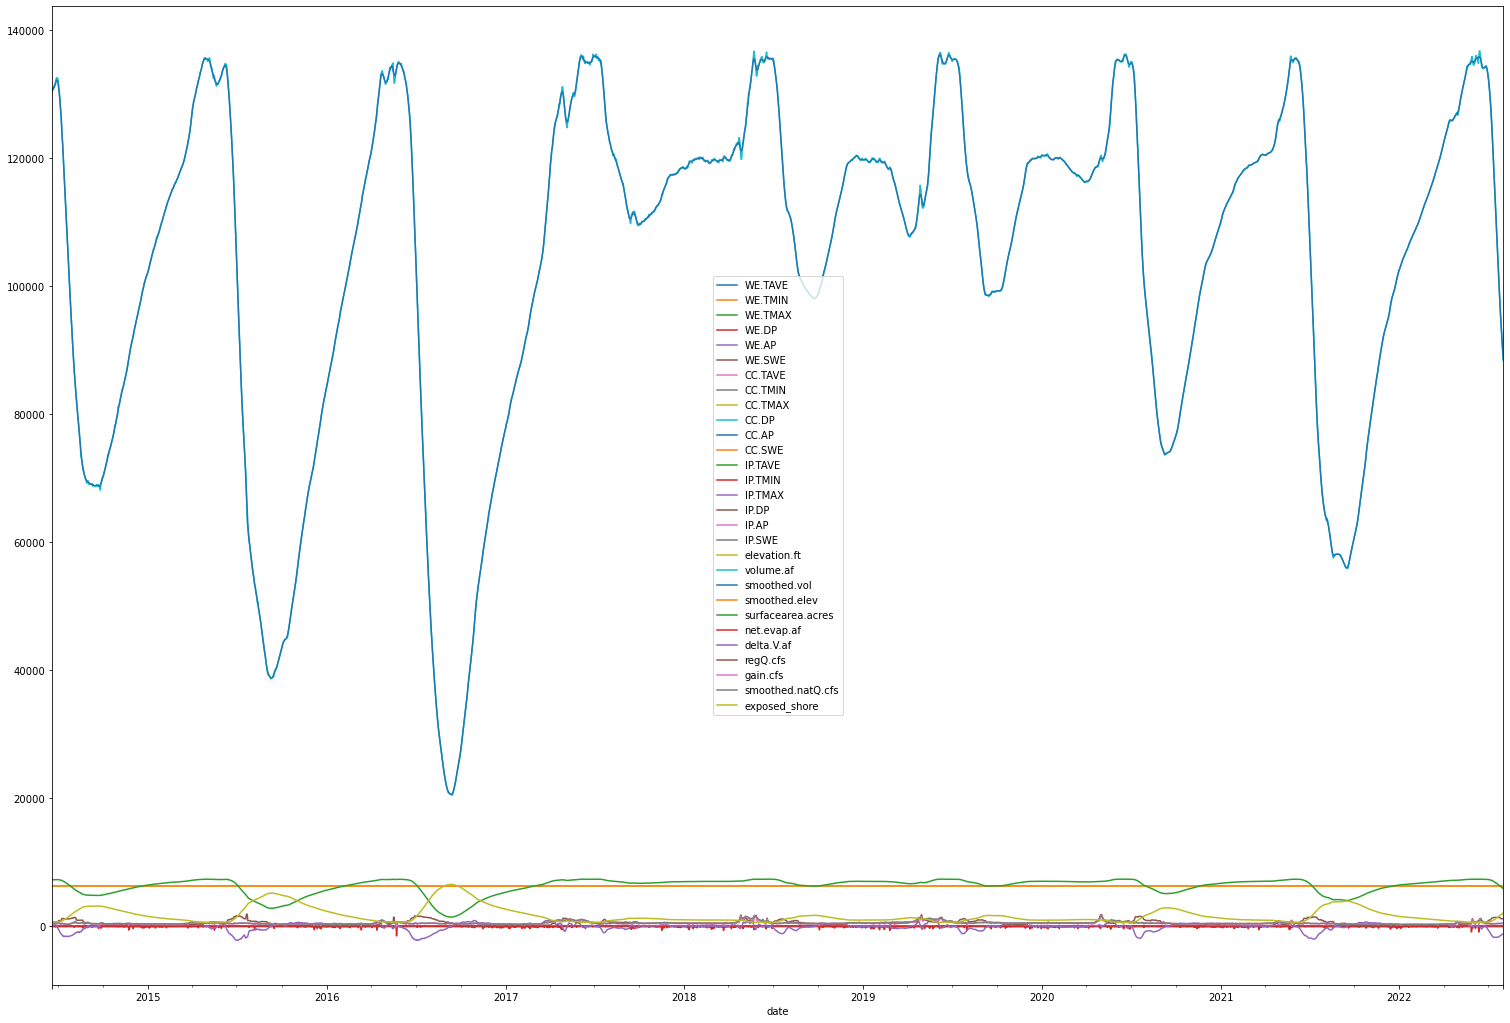

In [35]:
final_df.plot(figsize=(26,18))

In [36]:
final_df.sort_index()

,WE.TAVE,WE.TMIN,WE.TMAX,WE.DP,WE.AP,WE.SWE,CC.TAVE,CC.TMIN,CC.TMAX,CC.DP,...,volume.af,smoothed.vol,smoothed.elev,surfacearea.acres,net.evap.af,delta.V.af,regQ.cfs,gain.cfs,smoothed.natQ.cfs,exposed_shore
date,,,,,,,,,,,,,,,,,,,,,
2014-06-20,56.0,46.0,67.0,0.0,37.2,0.0,58.0,46.0,69.0,0.1,...,130463.600000,130508.842857,6302.415714,7270.598650,45.963939,157.885714,476.000000,512.621037,591.405028,729.401350
2014-06-21,55.0,49.0,62.0,0.0,37.2,0.0,58.0,48.0,68.0,0.0,...,130621.900000,130700.671429,6302.440000,7273.992421,47.815575,191.828571,459.000000,513.032397,599.594050,726.007579
2014-06-22,50.0,43.0,57.0,0.2,37.4,0.0,52.0,46.0,62.0,0.0,...,131097.500000,130858.485714,6302.460000,7277.366317,45.131249,157.814286,449.000000,483.831078,601.354315,722.633683
2014-06-23,54.0,44.0,64.0,0.0,37.4,0.0,56.0,45.0,68.0,0.1,...,130857.600000,130971.200000,6302.474286,7279.964667,49.711959,112.714286,459.000000,473.033457,586.847675,720.035333
2014-06-24,58.0,47.0,71.0,0.0,37.4,0.0,60.0,51.0,71.0,0.0,...,131252.600000,131209.542857,6302.504286,7283.303116,50.669190,238.342857,448.000000,525.632347,582.186314,716.696884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28,67.0,60.0,76.0,0.0,39.6,0.0,68.0,61.0,81.0,0.0,...,93365.484536,93409.446819,6297.247585,6111.232399,45.817345,-1345.832163,1182.187500,407.214395,442.453386,1888.767601
2022-07-29,66.0,56.0,78.0,0.0,39.6,0.0,67.0,57.0,83.0,0.0,...,92114.281296,92105.295324,6297.045029,6053.389930,45.452590,-1304.151495,1181.875000,429.932614,451.777714,1946.610070
2022-07-30,69.0,58.0,80.0,0.0,39.6,0.0,70.0,59.0,84.0,0.0,...,90828.083947,90842.356436,6296.846761,5996.327878,45.092242,-1262.938888,1183.750000,454.622985,465.082169,2003.672122


In [37]:
final_df['2014':]

,WE.TAVE,WE.TMIN,WE.TMAX,WE.DP,WE.AP,WE.SWE,CC.TAVE,CC.TMIN,CC.TMAX,CC.DP,...,volume.af,smoothed.vol,smoothed.elev,surfacearea.acres,net.evap.af,delta.V.af,regQ.cfs,gain.cfs,smoothed.natQ.cfs,exposed_shore
date,,,,,,,,,,,,,,,,,,,,,
2014-06-20,56.0,46.0,67.0,0.0,37.2,0.0,58.0,46.0,69.0,0.1,...,130463.600000,130508.842857,6302.415714,7270.598650,45.963939,157.885714,476.000000,512.621037,591.405028,729.401350
2014-06-21,55.0,49.0,62.0,0.0,37.2,0.0,58.0,48.0,68.0,0.0,...,130621.900000,130700.671429,6302.440000,7273.992421,47.815575,191.828571,459.000000,513.032397,599.594050,726.007579
2014-06-22,50.0,43.0,57.0,0.2,37.4,0.0,52.0,46.0,62.0,0.0,...,131097.500000,130858.485714,6302.460000,7277.366317,45.131249,157.814286,449.000000,483.831078,601.354315,722.633683
2014-06-23,54.0,44.0,64.0,0.0,37.4,0.0,56.0,45.0,68.0,0.1,...,130857.600000,130971.200000,6302.474286,7279.964667,49.711959,112.714286,459.000000,473.033457,586.847675,720.035333
2014-06-24,58.0,47.0,71.0,0.0,37.4,0.0,60.0,51.0,71.0,0.0,...,131252.600000,131209.542857,6302.504286,7283.303116,50.669190,238.342857,448.000000,525.632347,582.186314,716.696884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-28,67.0,60.0,76.0,0.0,39.6,0.0,68.0,61.0,81.0,0.0,...,93365.484536,93409.446819,6297.247585,6111.232399,45.817345,-1345.832163,1182.187500,407.214395,442.453386,1888.767601
2022-07-29,66.0,56.0,78.0,0.0,39.6,0.0,67.0,57.0,83.0,0.0,...,92114.281296,92105.295324,6297.045029,6053.389930,45.452590,-1304.151495,1181.875000,429.932614,451.777714,1946.610070
2022-07-30,69.0,58.0,80.0,0.0,39.6,0.0,70.0,59.0,84.0,0.0,...,90828.083947,90842.356436,6296.846761,5996.327878,45.092242,-1262.938888,1183.750000,454.622985,465.082169,2003.672122


In [38]:
ipe_turbid = pd.read_csv("data/daily_mean_data_HFF/IPE Turbidity Daily Mean IY 2022-08-10.csv")
ipe_turbid.drop(['Year.count','Min','Median','Max','Q1','Q3','StDev'], axis=1, inplace=True)
ipe_turbid.set_index(['X'], inplace=True)
ipe_turbid

,X2014,X2015,X2016,X2017,X2018,X2019,X2020,X2021,X2022,Mean
X,,,,,,,,,,
01-Nov,NaN,NaN,3.208105,2.949688,2.876667,3.249149,4.347083,3.024211,5.588842,3.275817
02-Nov,NaN,NaN,3.243263,2.991250,2.873750,2.263295,4.526947,2.809792,5.366809,3.118050
03-Nov,NaN,NaN,3.025521,2.599579,2.746146,0.830968,5.030737,2.810426,6.291458,2.840563
04-Nov,NaN,NaN,2.917579,2.313958,2.837188,1.320581,5.095368,2.880105,6.521522,2.894130
05-Nov,NaN,NaN,2.910833,2.347604,2.915417,0.617826,5.108229,2.921875,6.538022,2.803631
...,...,...,...,...,...,...,...,...,...,...
27-Oct,NaN,3.373333,3.925319,2.432211,5.790526,3.073125,3.604526,6.443441,NaN,4.091783
28-Oct,NaN,3.300729,3.820833,2.681702,4.629579,3.516354,3.448280,5.313763,NaN,3.815891
29-Oct,NaN,3.469158,3.605000,2.871875,4.562660,4.033085,3.291809,5.361170,NaN,3.884965


In [ ]:
ipe_turbid['Mean'].plot(figsize=(16,6))

In [ ]:
data_transform = pd.Series(np.log(ipe_turbid['Mean']))
rolmean = data_transform.rolling(window=4, center=False).mean()
data_minus_rolmean = data_transform - rolmean

In [ ]:
fig = plt.figure(figsize=(11, 7))
orig = plt.plot(data_transform, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
minus = plt.plot(data_minus_rolmean, color='green', label='Minus')
plt.legend(loc='best')
plt.title('Original, Rolling Mean, Minus')
plt.show(block=False)

In [ ]:
diff = data_transform.diff().dropna()
dftest = adfuller(diff)
display_df(dftest)

In [ ]:
rolmean.plot()

In [ ]:
ipe_chloro = pd.read_csv('data/daily_mean_data_HFF/IPE Chloro Daily Mean IY 2022-08-10.csv')
ipe_chloro.drop(['Year.count'], axis=1, inplace=True)
ipe_chloro.set_index(['X'], inplace=True)
ipe_chloro

In [ ]:
ipe_chloro.plot(figsize=(16,6))

In [ ]:
ipe_cond = pd.read_csv('data/daily_mean_data_HFF/IPE Cond Daily Mean IY 2022-08-10.csv')
ipe_cond.drop(['Year.count'], axis=1, inplace=True)
ipe_cond.set_index(['X'], inplace=True)
ipe_cond

In [ ]:
ipe_cond.plot(figsize=(16,6))

In [ ]:
ipe_odo = pd.read_csv('data/daily_mean_data_HFF/IPE ODO Daily Mean IY 2022-08-10.csv')
ipe_odo.drop(['Year.count','Min','Median','Max','Q1','Q3','StDev'], axis=1, inplace=True)
ipe_odo.set_index(['X'], inplace=True)
ipe_odo

In [ ]:
ipe_odo['Mean'].plot(figsize=(16,6))

In [ ]:
ipe_temp = pd.read_csv("data/daily_mean_data_HFF/IPE Temp_C Daily Mean IY 2022-08-10.csv")
ipe_temp

In [ ]:
ipe_temp.plot(figsize=(16,6))

In [ ]:
ipe_bga = pd.read_csv('data/daily_mean_data_HFF/IPE BGA Daily Mean IY 2022-08-10.csv')
ipe_bga

In [ ]:
ipe_bga.plot(figsize=(16,6))